# NNCL ASSIGNMENT 3

## Libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Neural Network

In [13]:
class Network:
    def __init__(self, P, Q, N, K, learning_rate):
        self.P = P                      # Number of input samples
        self.Q = Q                      # Number of test samples
        self.N = N                      # Number of neurons in the input layer
        self.K = K                      # Number of neurons in the hidden layer
        self.eta = learning_rate        # Learning rate for the neural network
        self.W = self.initWeights()     # Weights from input layer to hidden layer
        self.V = np.ones((1, self.K))   # Weights from hidden layer to output layer, initialized to 1

    def initWeights(self):
        """
        This function initializes the weights of the neural network.	
        """
        # Generate random weights for each neuron in the hidden layer
        weights = np.random.randn(self.N, self.K)

        # Calculate the squared norm (length) of each weight vector
        norms_squared = np.linalg.norm(weights, axis=1, keepdims=True) ** 2

        # Normalize each weight vector to have a length of 1
        normalized_weights = weights / norms_squared

        return normalized_weights

    def forwardPass(self, x):
        """
        This function performs the forward pass of a neural network with a single hidden layer.
        It uses the tanh activation function for the hidden layer neurons.
        """
        # Calculate the dot product of the input vector 'x' and the transpose of the weight matrix 'W' of the first layer.
        dot_product = np.dot(self.W.T, x)

        # Apply the hyperbolic tangent function element-wise to the result of the dot product.
        tanh_result = np.tanh(dot_product)

        # Calculate the output of the network ('sigma') by multiplying the output weights 'V' with the tanh_result and summing the result.
        sigma = np.sum(self.V * tanh_result)

        # Return the output of the network for the given input 'x'.
        return sigma

    def stochasticGradientDescent(self, sigma, xi, tau):
        """
        Stochastic gradient descent
        """
        # Use the gradient with respect to its contribution to the error
        for i in range(self.K):
            gradient = (sigma - tau) * (1 - np.tanh(np.dot(self.W[:, i], xi)) ** 2)
            # Update the weights
            self.W[:, i] = self.W[:, i] - self.eta * gradient * xi

    def calculateError(self, sigma, tau):
        """
        This function calculates the error of the neural network's output.
        The error is defined as the half of the squared difference between the network's output (sigma) and the target value (tau).
        """
        # Compute the error
        return ((sigma - tau) ** 2) / 2

    def train(self, t_max, train_set, test_set):
        """
        Train the network using stochastic gradient descent.
        """
        # Initialize lists to store training and testing errors
        train_err = []
        test_err = []

        # Run the training for t_max epochs
        for epoch in range(t_max):
            # Initialize error trackers for the current epoch
            epoch_error = 0
            epoch_error_test = 0

            # For each training sample in a random order
            for index in np.random.permutation(self.P):
                xi, tau = train_set[index]  # Get input and target output
                sigma = self.forwardPass(xi)  # Perform forward pass
                epoch_error += self.calculateError(sigma, tau)  # Calculate and accumulate error
                self.stochasticGradientDescent(sigma, xi, tau)  # Update weights using SGD

            # Calculate average training error for the epoch
            epoch_error /= self.P

            # For each testing sample in a random order
            for index in np.random.permutation(self.Q):
                xi, tau = test_set[index]  # Get input and target output
                sigma = self.forwardPass(xi)  # Perform forward pass
                epoch_error_test += self.calculateError(sigma, tau)  # Calculate and accumulate error

            # Calculate average testing error for the epoch
            epoch_error_test /= self.Q

            # Store the average errors for this epoch
            train_err.append(epoch_error)
            test_err.append(epoch_error_test)

            # Print the average errors for this epoch
            print(f"Epoch: {epoch}, Error: {epoch_error.item()}, Test Error: {epoch_error_test.item()}")

        # Return the list of average training and testing errors for each epoch
        return train_err, test_err

## Run Networks

In [14]:
# Load input data from CSV file
xi = pd.read_csv("data/xi.csv", delimiter=",", header=None)

# Load target output data from CSV file
tau = pd.read_csv("data/tau.csv", delimiter=",", header=None)

# Combine input and target output data into a dataset of (input, target) pairs
dataset = [(xi.iloc[:, i], tau.iloc[:, i][0]) for i in range(5000)]

# Define network parameters
P = 600  # Number of training samples
Q = 200  # Number of testing samples
N = 50   # Input dimensionality
K = 2    # Number of neurons in the hidden layer

# Split dataset into training and testing sets
train_set = dataset[:P]
test_set = dataset[P:P+Q]

# Initialize network with specified parameters and learning rate
network = Network(P=P, Q=Q, N=N, K=K, learning_rate=0.05)

# Train the network and retrieve training and testing errors
train_err, test_err = network.train(t_max=100, train_set=train_set, test_set=test_set)

Epoch: 0, Error: 0.547307709843982, Test Error: 0.2520003399171833
Epoch: 1, Error: 0.1865743051559822, Test Error: 0.1713563190302483
Epoch: 2, Error: 0.11801591046133972, Test Error: 0.12744887133928337
Epoch: 3, Error: 0.10368586525344514, Test Error: 0.15009731899662102
Epoch: 4, Error: 0.095136669118362, Test Error: 0.14075677237555934
Epoch: 5, Error: 0.0949098140797703, Test Error: 0.13538428424137927
Epoch: 6, Error: 0.09258423818683564, Test Error: 0.1241014255365594
Epoch: 7, Error: 0.09484209883527563, Test Error: 0.12394177397468578
Epoch: 8, Error: 0.08709463270447948, Test Error: 0.125823832052466
Epoch: 9, Error: 0.0871869843192522, Test Error: 0.11341176620463811
Epoch: 10, Error: 0.08622506044703934, Test Error: 0.12438230454561408
Epoch: 11, Error: 0.0800853907772658, Test Error: 0.12174460758788247
Epoch: 12, Error: 0.08323620164438286, Test Error: 0.1235810556846001
Epoch: 13, Error: 0.08324446094305087, Test Error: 0.12817296333338613
Epoch: 14, Error: 0.0871312968

## Plot the Results

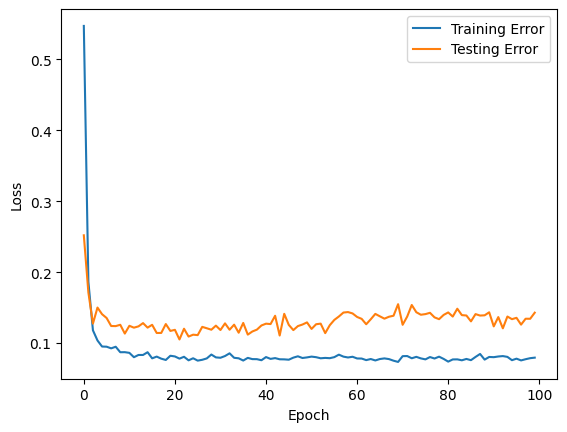

In [18]:
# Plot the training and testing errors over epochs
plt.plot(train_err, label="Training Error")
plt.plot(test_err, label="Testing Error")

# Add a legend to the plot
plt.legend()

# Add labels to the x and y axes
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Display the plot
plt.show()